In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split  
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df_train = pd.read_csv('/Users/tshmacm1173/Desktop/Sprint 6 ML/Traffic_Jam_Analysis/train_revised.csv')

In [ ]:
df_train.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [ ]:
df_test = pd.read_csv('/Users/tshmacm1173/Desktop/Sprint 6 ML/Traffic_Jam_Analysis/test_questions.csv') 

In [ ]:
df_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


In [ ]:

df_test["travel_date"] = pd.to_datetime(df_test["travel_date"])
df_test["year"] = df_test["travel_date"].dt.year
df_test["month"] = df_test["travel_date"].dt.month
df_test["day"] = df_test["travel_date"].dt.day
df_test["weekday"] = df_test["travel_date"].dt.weekday
df_test["is_weekend"] = df_test["weekday"].apply(lambda x: 1 if x >= 5 else 0) 
df_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,month,day,weekday,is_weekend
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49,2018,5,7,0,0
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11,2018,5,6,6,1
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11,2018,5,4,4,0
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11,2018,5,4,4,0
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11,2018,5,4,4,0


In [ ]:
df_test['hour'] = df_test['travel_time'].str.split(':').str[0].astype(int)  
df_test['minute'] = df_test['travel_time'].str.split(':').str[1].astype(int)   
df_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,month,day,weekday,is_weekend,hour,minute
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49,2018,5,7,0,0,7,6
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11,2018,5,6,6,1,11,8
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11,2018,5,4,4,0,5,0
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11,2018,5,4,4,0,9,10
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11,2018,5,4,4,0,9,20


In [ ]:

df_train['travel_date'] = pd.to_datetime(df_train['travel_date'], format='%d-%m-%y')
df_train['year'] = df_train['travel_date'].dt.year  
df_train['month'] = df_train['travel_date'].dt.month  
df_train['day'] = df_train['travel_date'].dt.day 
df_train["weekday"] = df_train["travel_date"].dt.weekday
df_train["is_weekend"] = df_train["weekday"].apply(lambda x: 1 if x >= 5 else 0) 
df_train.head()  

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,month,day,weekday,is_weekend
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,2017,10,17,1,0
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,2017,11,19,6,1
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,2017,11,26,6,1
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,2017,11,27,0,0
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,2017,11,27,0,0


In [ ]:

df_train['hour'] = df_train['travel_time'].str.split(':').str[0].astype(int)  
df_train['minute'] = df_train['travel_time'].str.split(':').str[1].astype(int)   
df_train.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,month,day,weekday,is_weekend,hour,minute
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,2017,10,17,1,0,7,15
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,2017,11,19,6,1,7,12
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,2017,11,26,6,1,7,5
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,2017,11,27,0,0,7,10
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,2017,11,27,0,0,7,12


In [ ]:

df_train_tickets = df_train.groupby("ride_id").size().reset_index(name="number_of_tickets")
df_train = df_train.merge(df_train_tickets, on="ride_id")
df_train.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,year,month,day,weekday,is_weekend,hour,minute,number_of_tickets
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49,2017,10,17,1,0,7,15,1
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49,2017,11,19,6,1,7,12,1
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49,2017,11,26,6,1,7,5,1
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49,2017,11,27,0,0,7,10,5
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49,2017,11,27,0,0,7,12,31


In [ ]:
df_train.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity', 'year', 'month', 'day', 'weekday', 'is_weekend', 'hour',
       'minute', 'number_of_tickets'],
      dtype='object')

Explotary Data Analysis:

                                             |          | [  0%]   00:00 -> (? left)

Report claims_analysis_sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



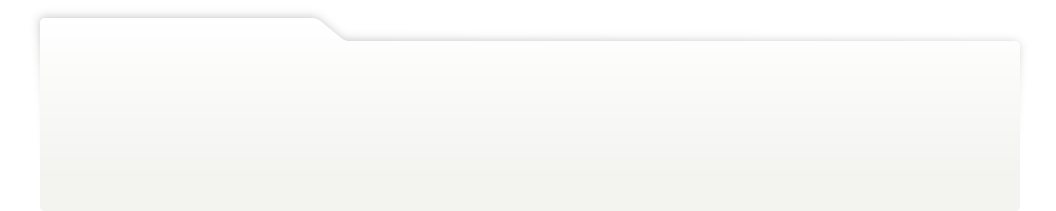
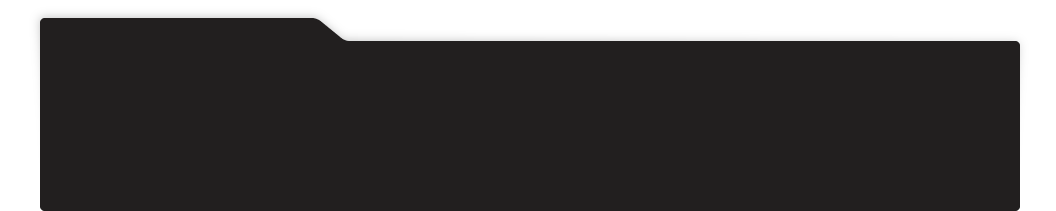
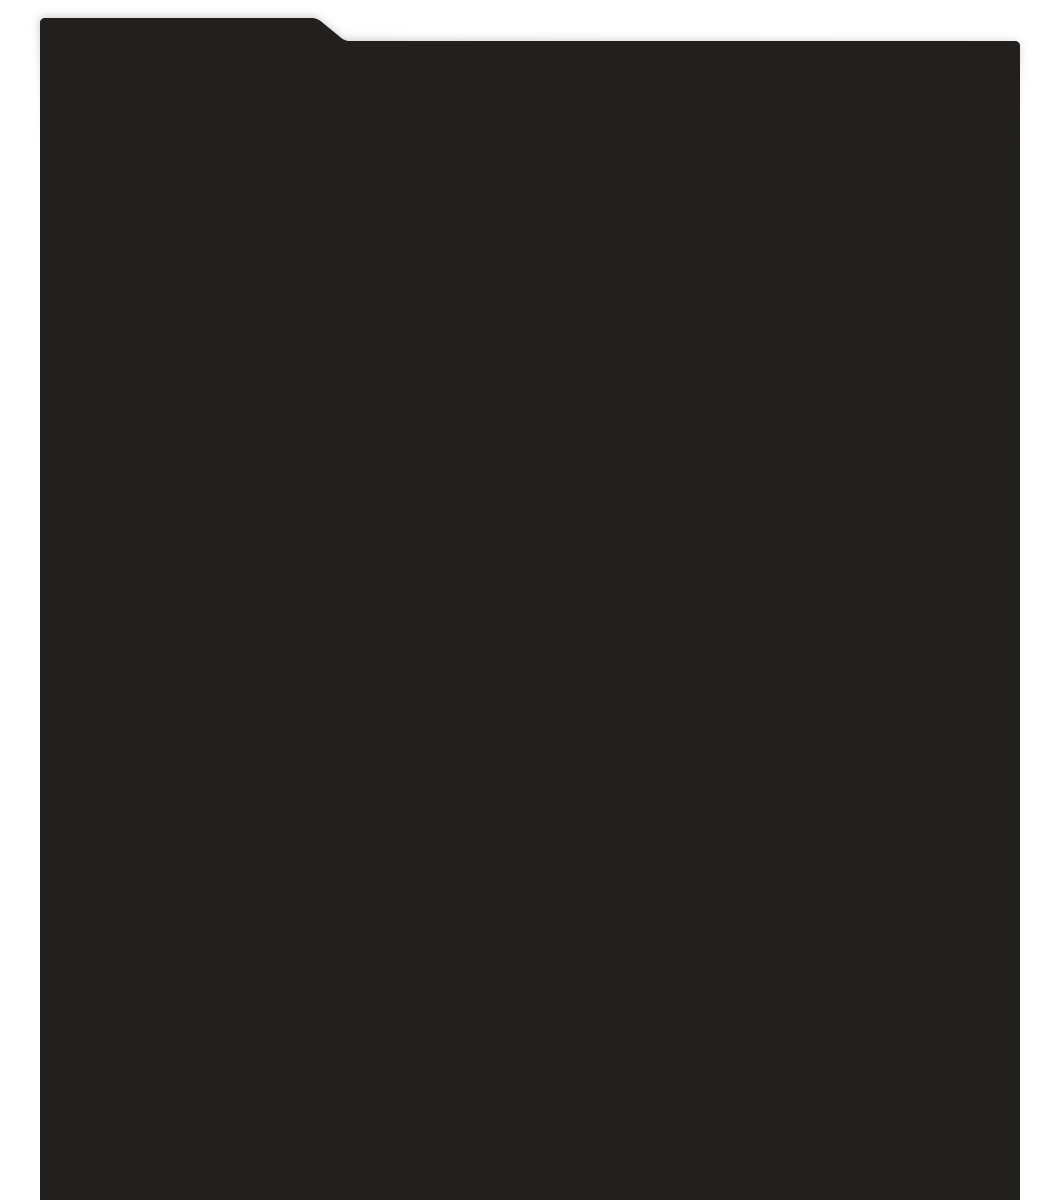
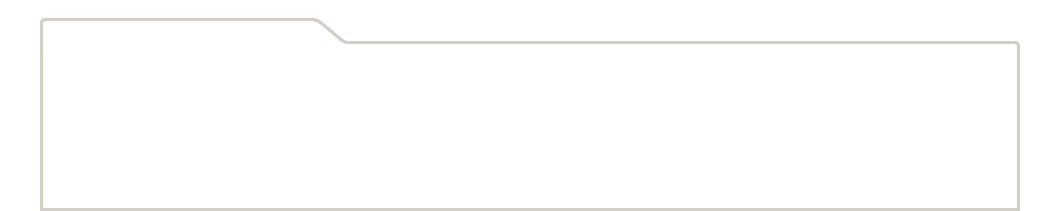
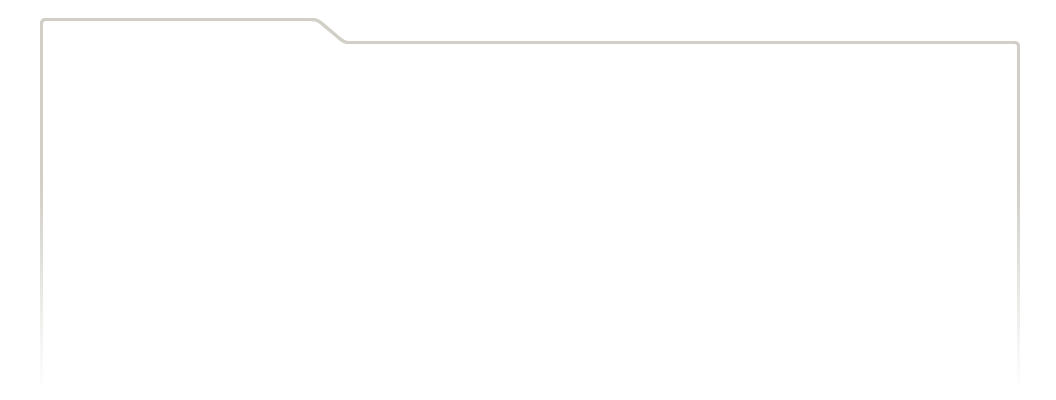
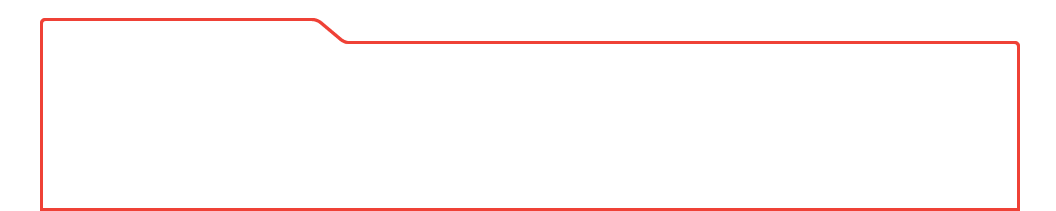
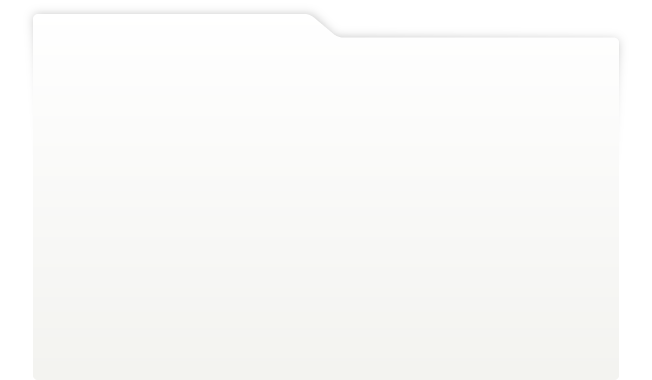
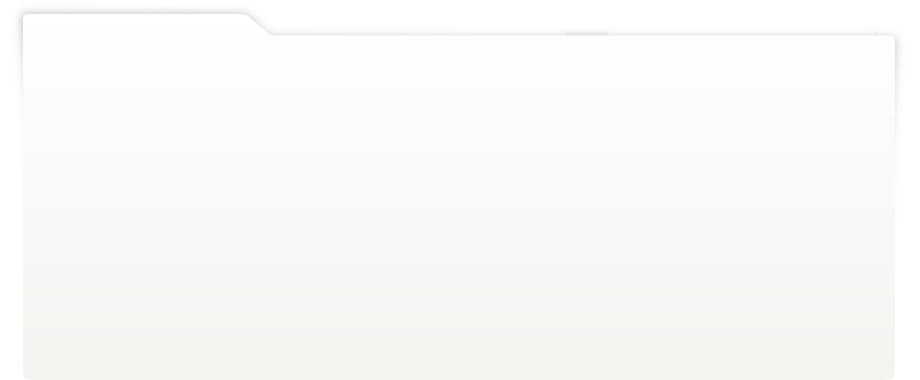
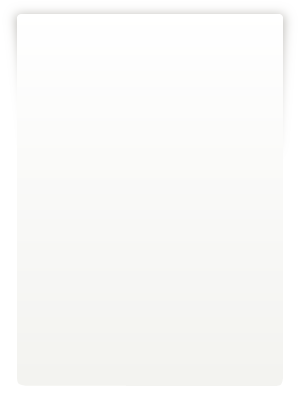
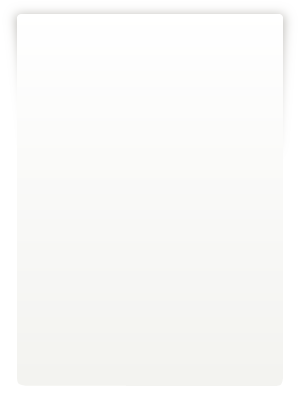
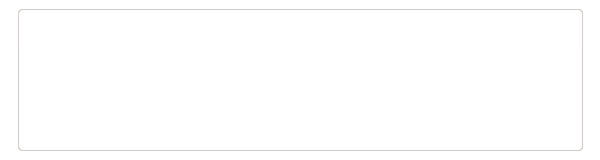
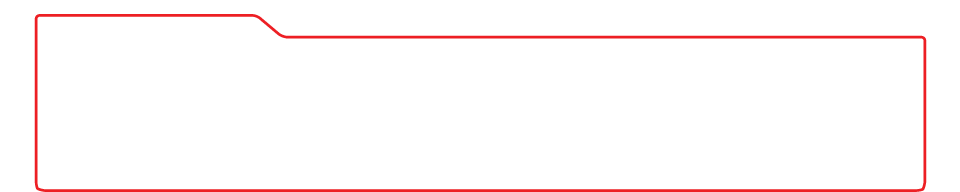
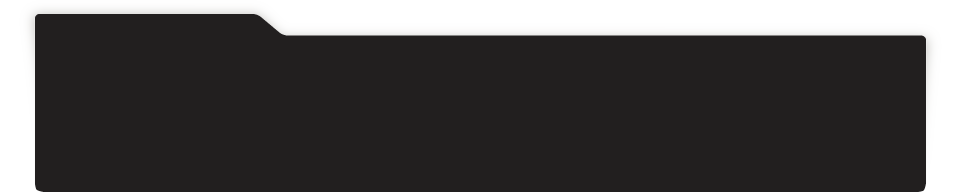
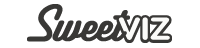
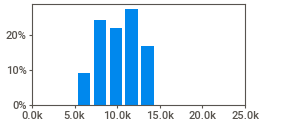
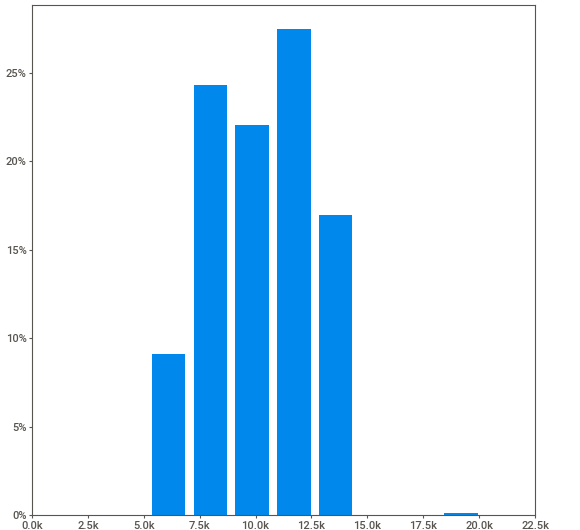
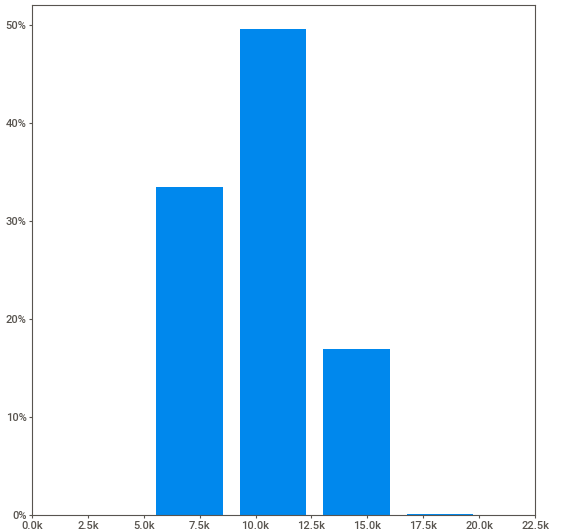
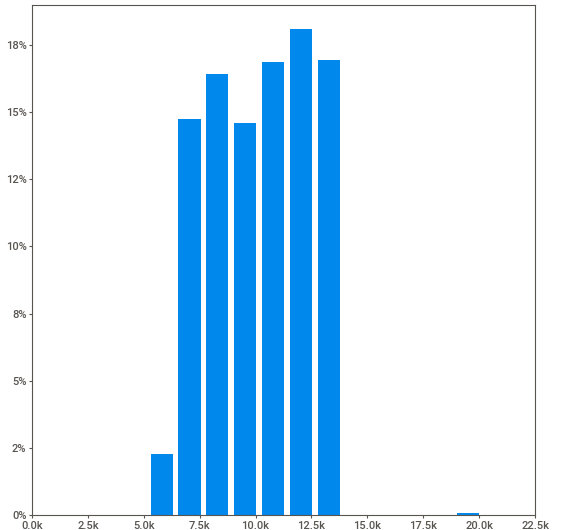
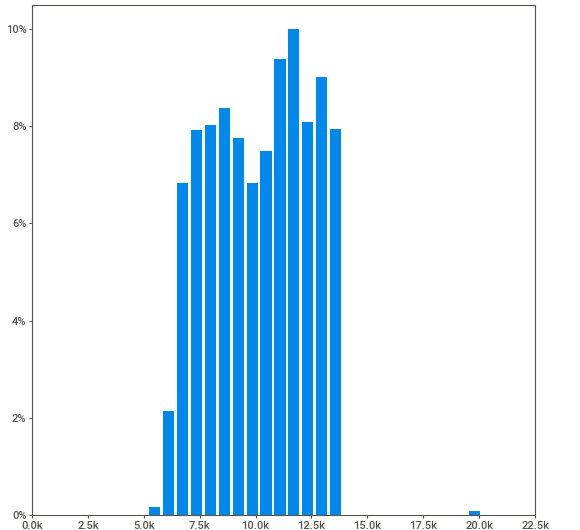
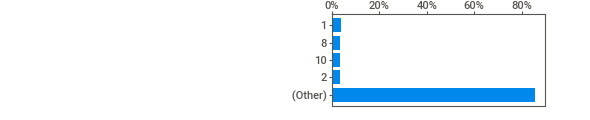
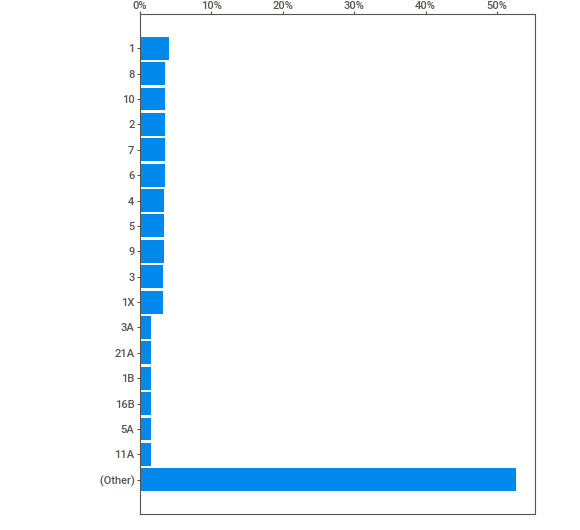
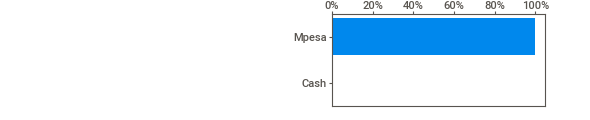
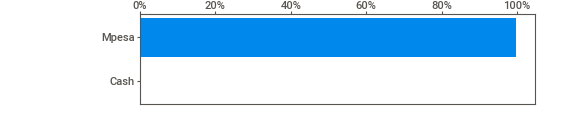
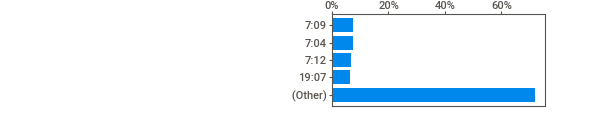
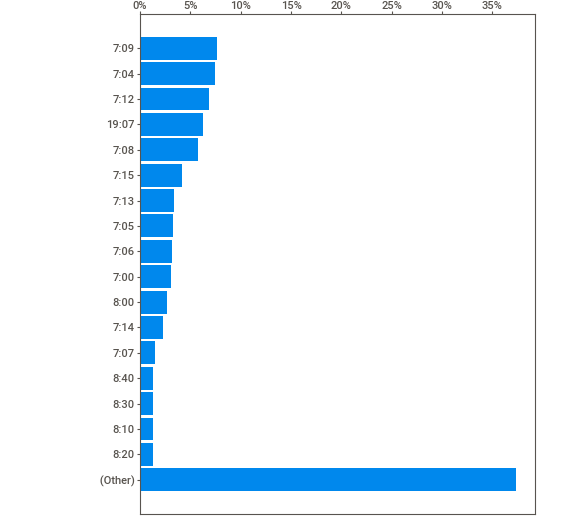
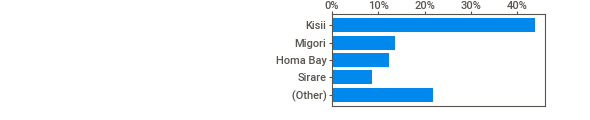
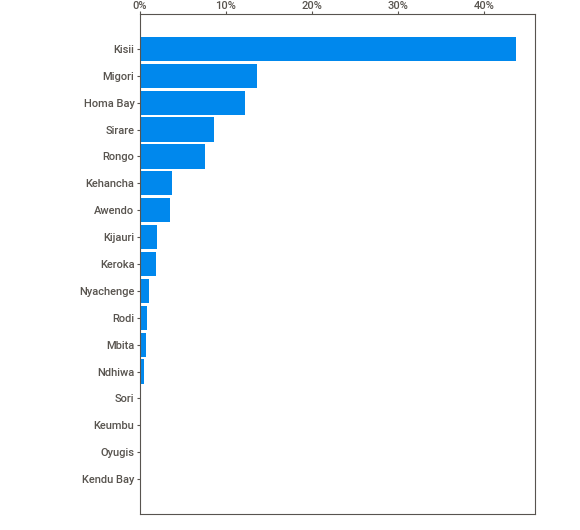
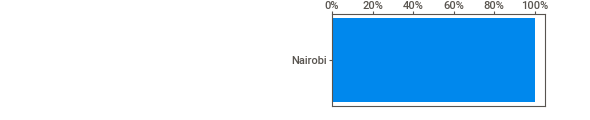
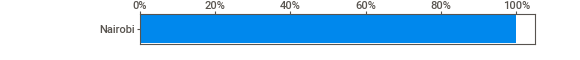
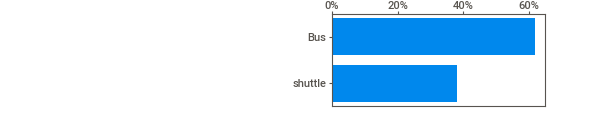
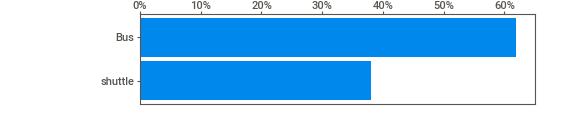
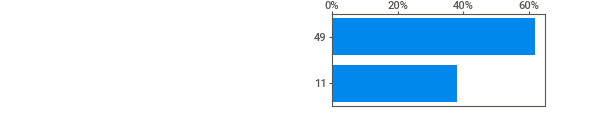
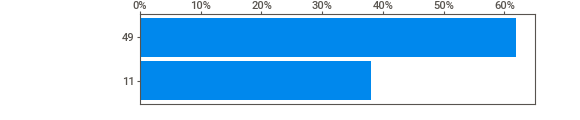
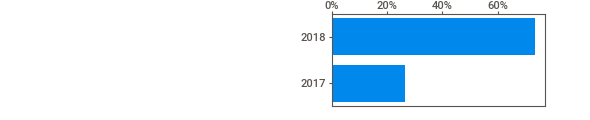
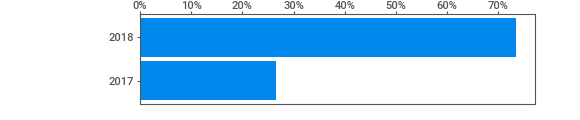
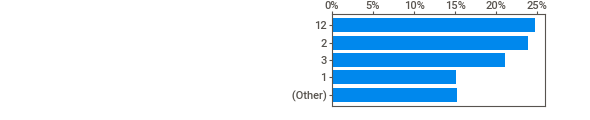
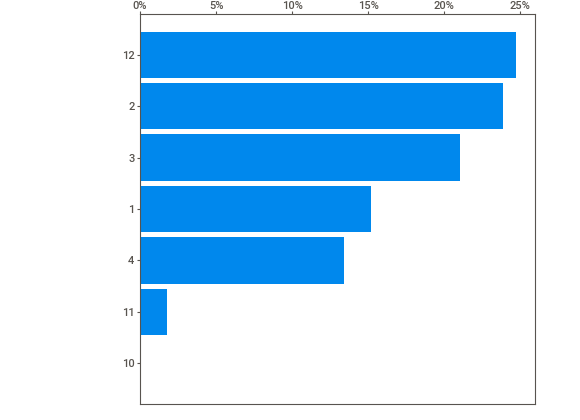
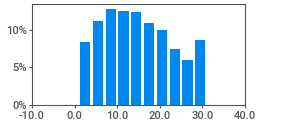
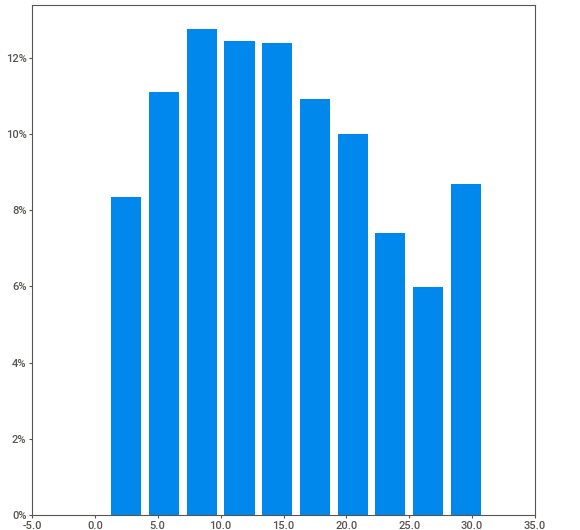
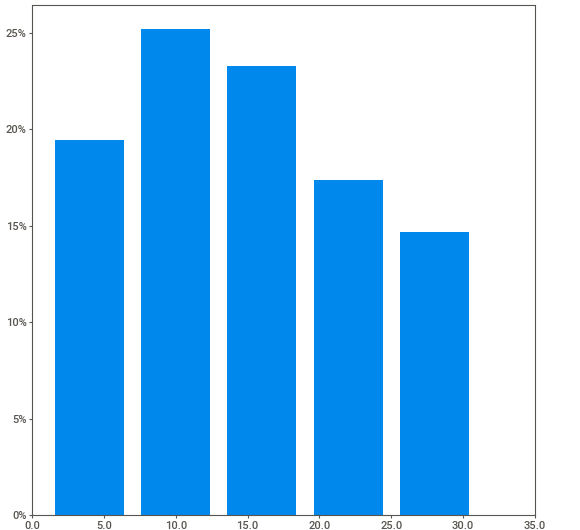
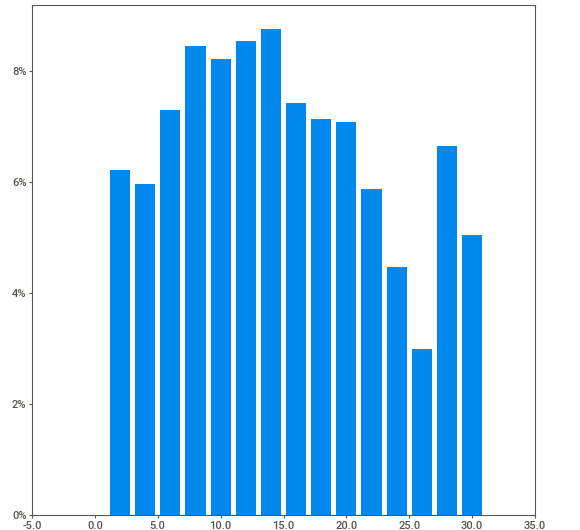
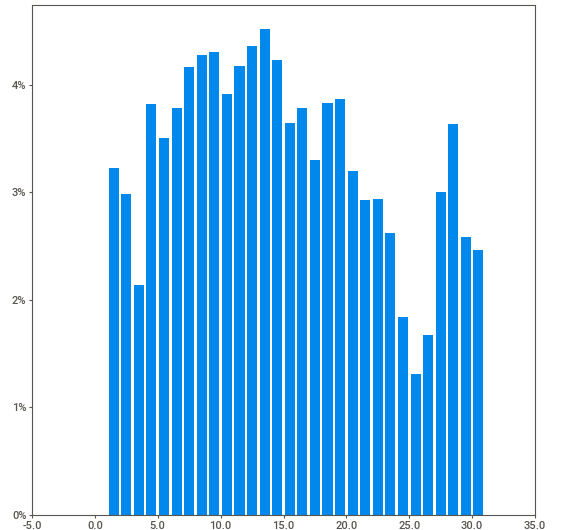
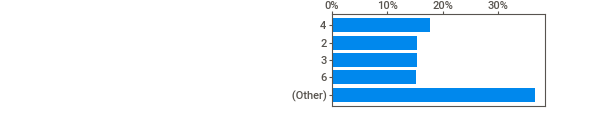
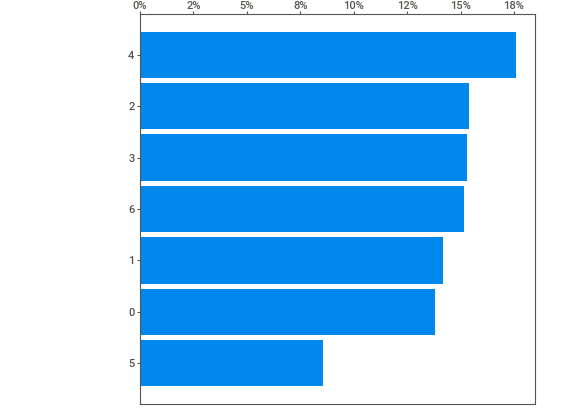
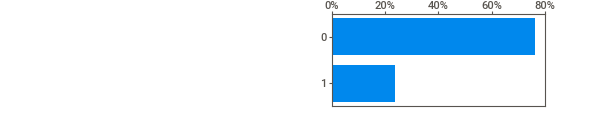
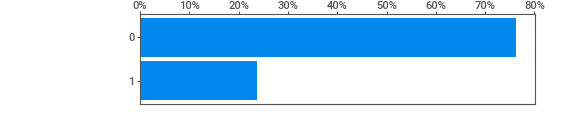
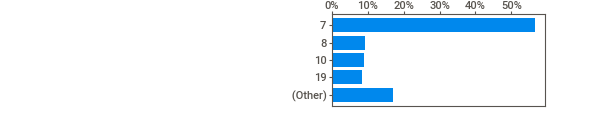
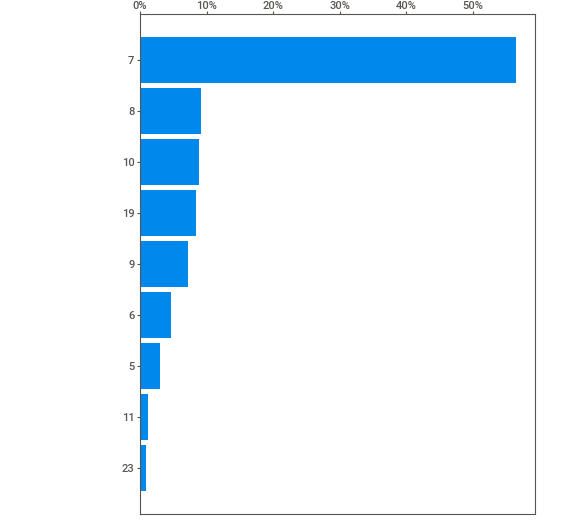
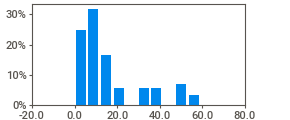
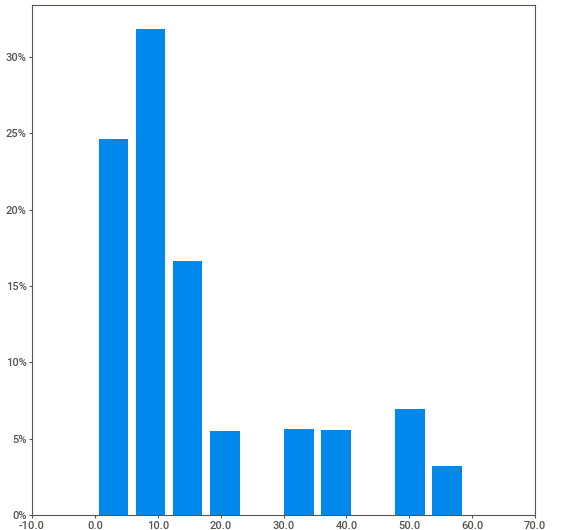
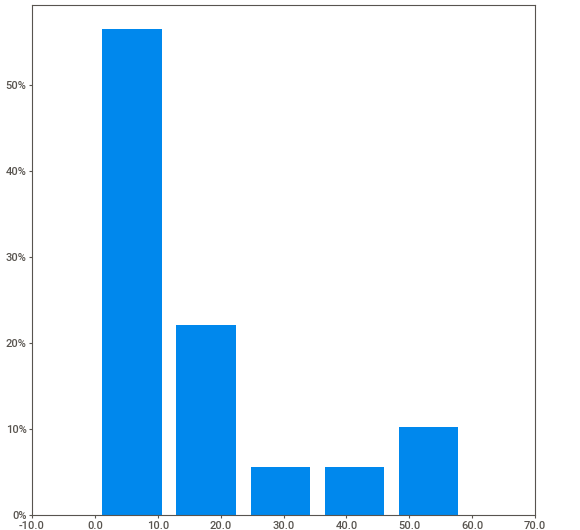
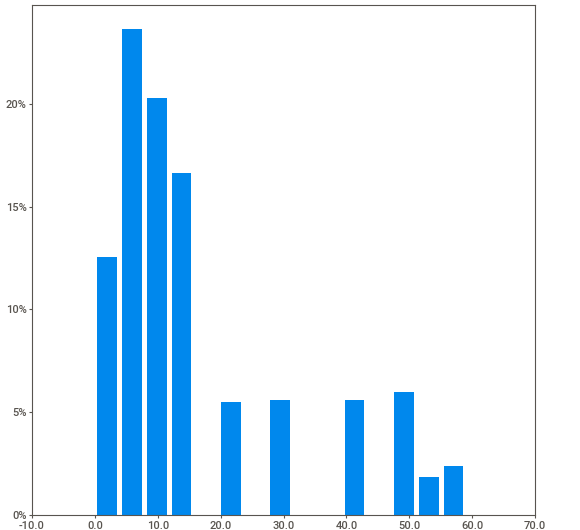
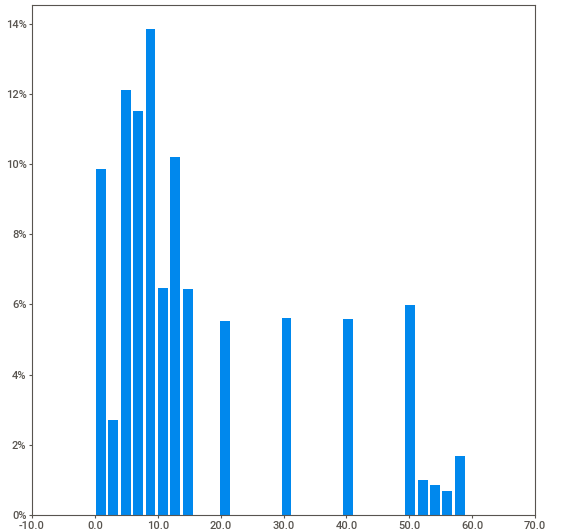
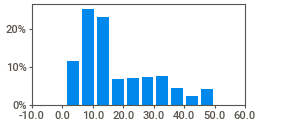
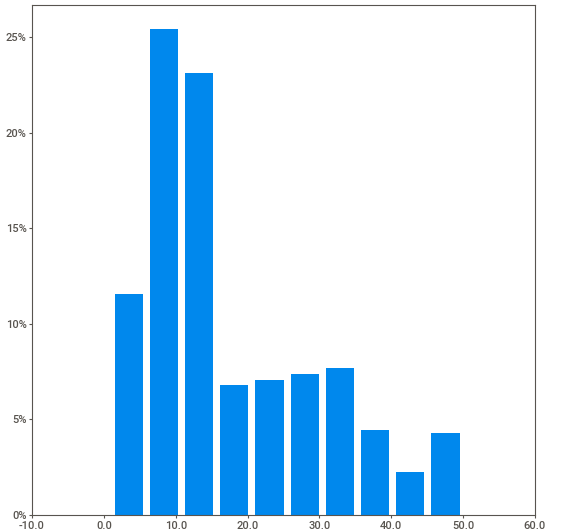
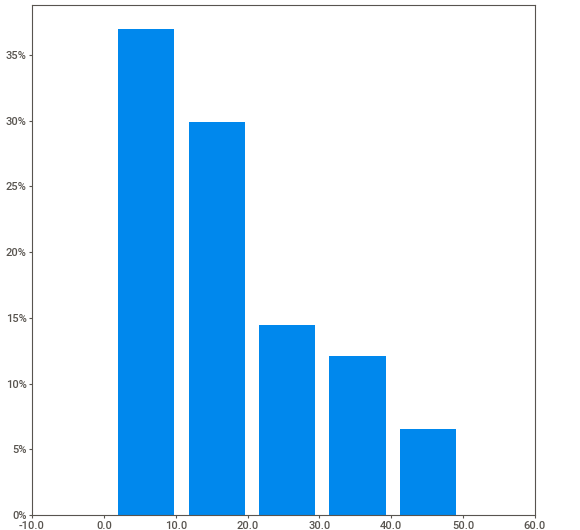
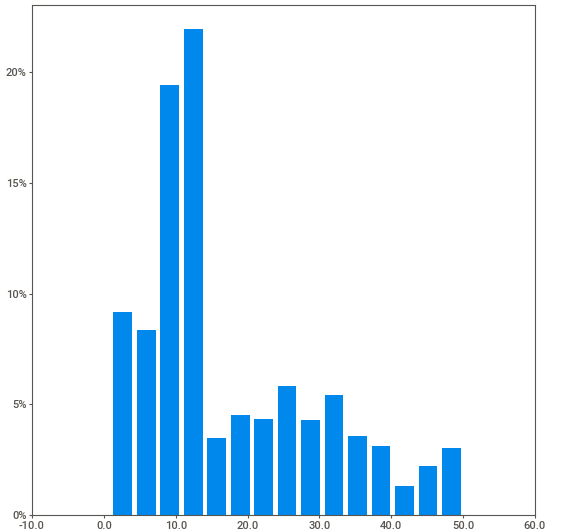
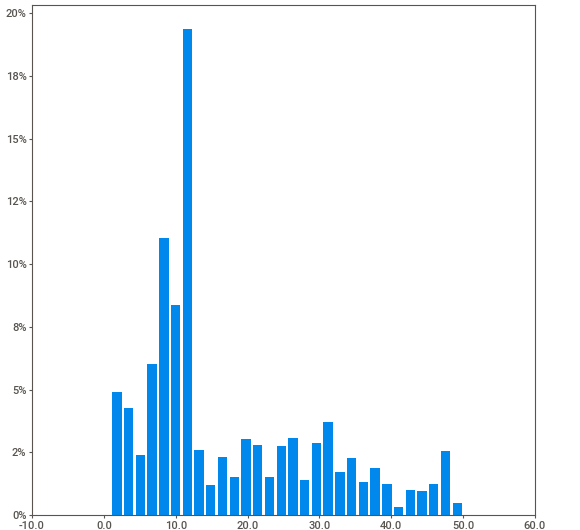
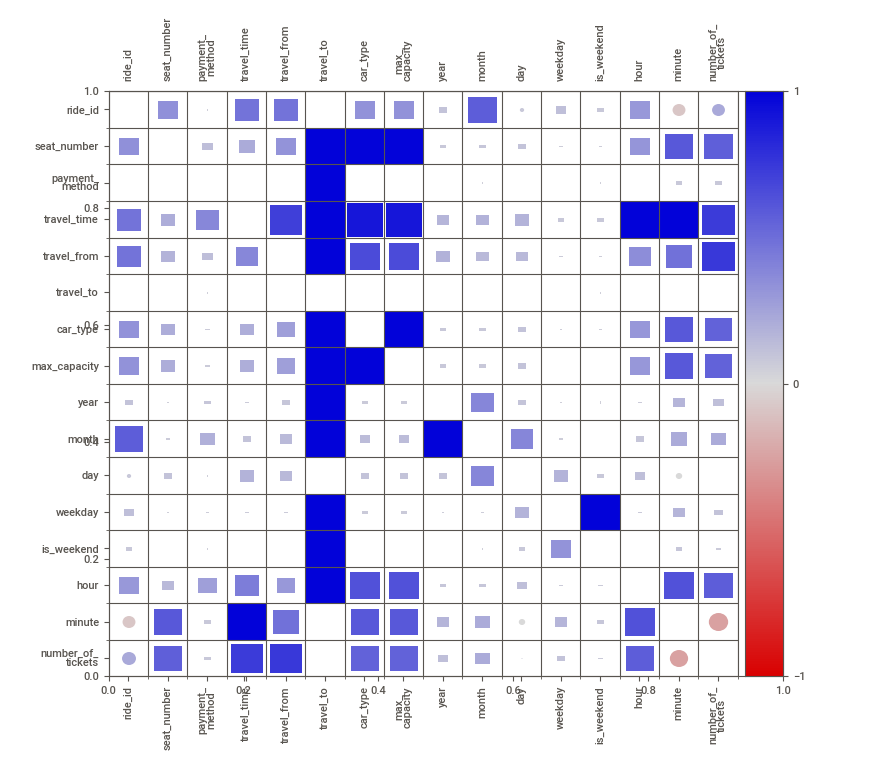
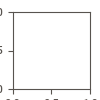

In [ ]:
!pip install  sweetviz
import sweetviz as sv
report = sv.analyze(df_train)
report.show_html("claims_analysis_sweetviz_report.html")
report.show_notebook()

In [ ]:
# Calculate the average number of tickets
average_tickets = df_train["number_of_tickets"].mean()
print(f"Average number of tickets: {average_tickets}")

Average number of tickets: 17.280917804240488


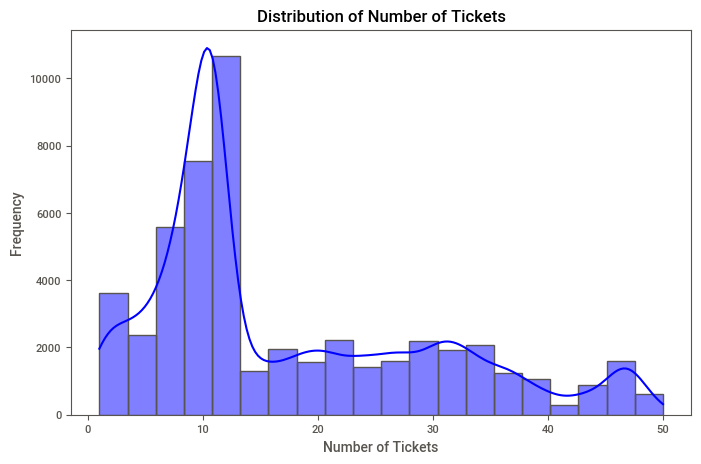

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(df_train["number_of_tickets"], bins=20, kde=True, color="blue")
plt.title("Distribution of Number of Tickets")
plt.xlabel("Number of Tickets")
plt.ylabel("Frequency")
plt.show()

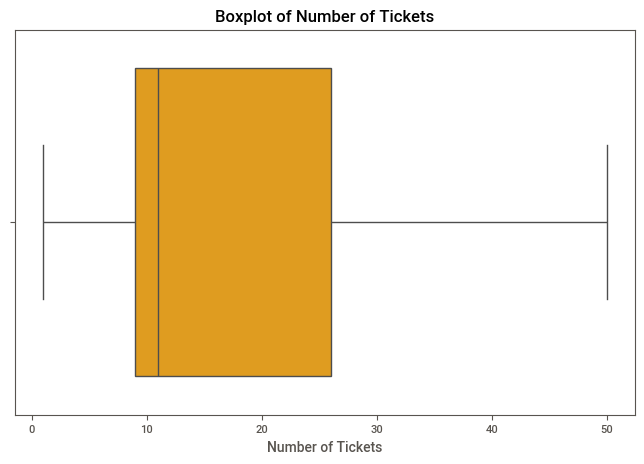

In [ ]:
# Use a boxplot to check for outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_train["number_of_tickets"], color="orange")
plt.title("Boxplot of Number of Tickets")
plt.xlabel("Number of Tickets")
plt.show()

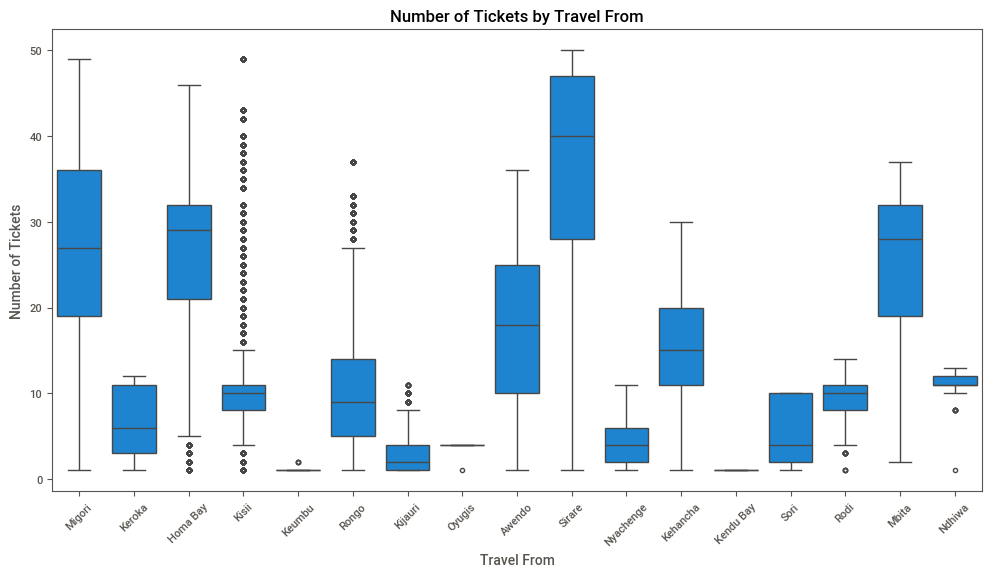

In [ ]:
# Boxplot for travel_from vs number_of_tickets
plt.figure(figsize=(12, 6))
sns.boxplot(x="travel_from", y="number_of_tickets", data=df_train)
plt.title("Number of Tickets by Travel From")
plt.xlabel("Travel From")
plt.ylabel("Number of Tickets")
plt.xticks(rotation=45)
plt.show()

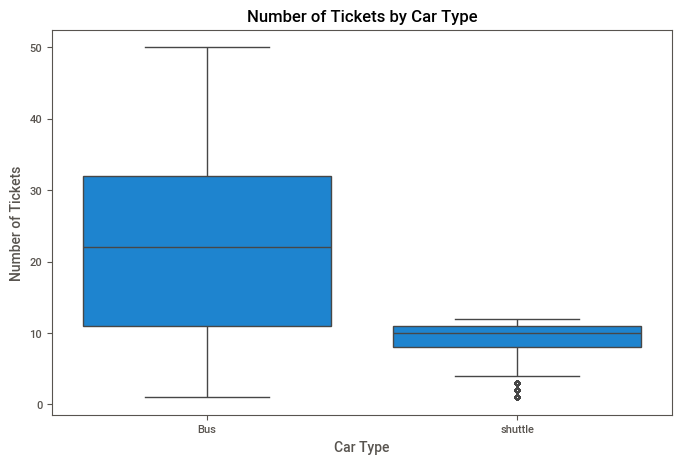

In [ ]:
# Boxplot for car_type vs number_of_tickets
plt.figure(figsize=(8, 5))
sns.boxplot(x="car_type", y="number_of_tickets", data=df_train)
plt.title("Number of Tickets by Car Type")
plt.xlabel("Car Type")
plt.ylabel("Number of Tickets")
plt.show()

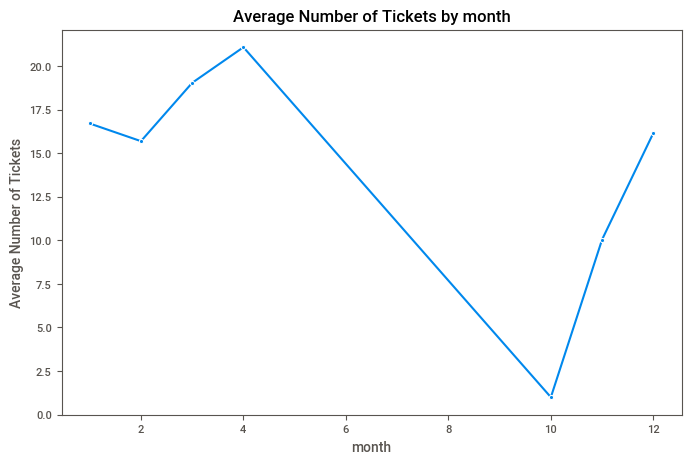

In [ ]:
# Lineplot for month vs average number of tickets
monthly_tickets = df_train.groupby("month")["number_of_tickets"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x="month", y="number_of_tickets", data=monthly_tickets, marker="o")
plt.title("Average Number of Tickets by month")
plt.xlabel("month")
plt.ylabel("Average Number of Tickets")
plt.show()

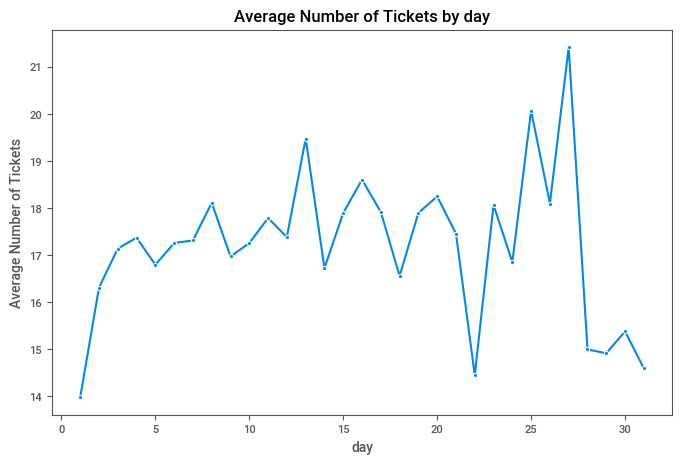

In [ ]:
# Lineplot for day vs average number of tickets
daily_tickets = df_train.groupby("day")["number_of_tickets"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x="day", y="number_of_tickets", data=daily_tickets, marker="o")
plt.title("Average Number of Tickets by day")
plt.xlabel("day")
plt.ylabel("Average Number of Tickets")
plt.show()

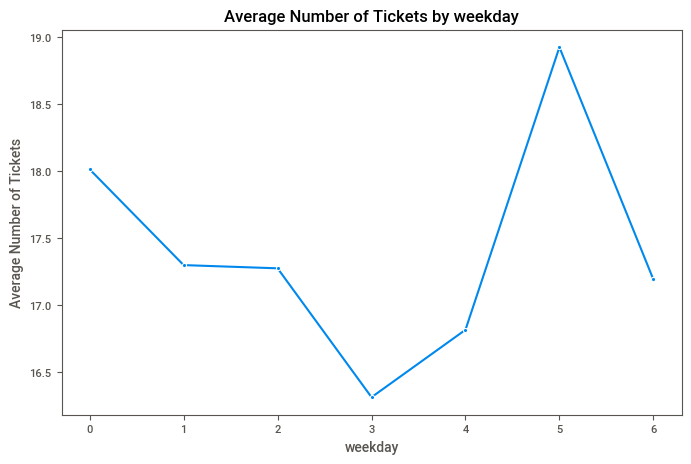

In [ ]:
# Lineplot for weekday vs average number of tickets
weekdaily_tickets = df_train.groupby("weekday")["number_of_tickets"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x="weekday", y="number_of_tickets", data=weekdaily_tickets, marker="o")
plt.title("Average Number of Tickets by weekday")
plt.xlabel("weekday")
plt.ylabel("Average Number of Tickets")
plt.show()

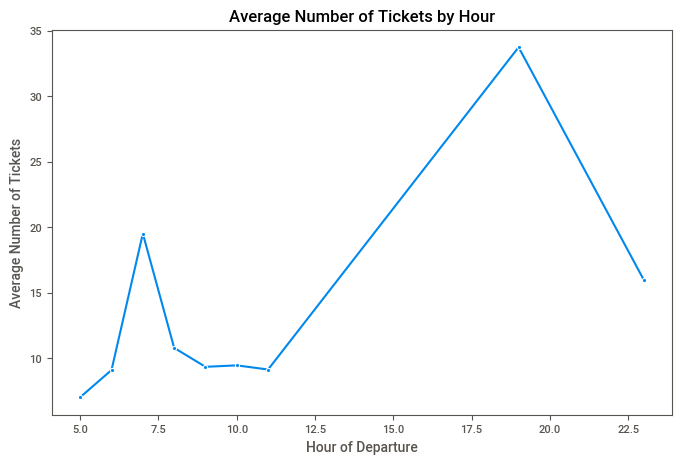

In [ ]:
# Lineplot for hour vs average number of tickets
hourly_tickets = df_train.groupby("hour")["number_of_tickets"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.lineplot(x="hour", y="number_of_tickets", data=hourly_tickets, marker="o")
plt.title("Average Number of Tickets by Hour")
plt.xlabel("Hour of Departure")
plt.ylabel("Average Number of Tickets")
plt.show()

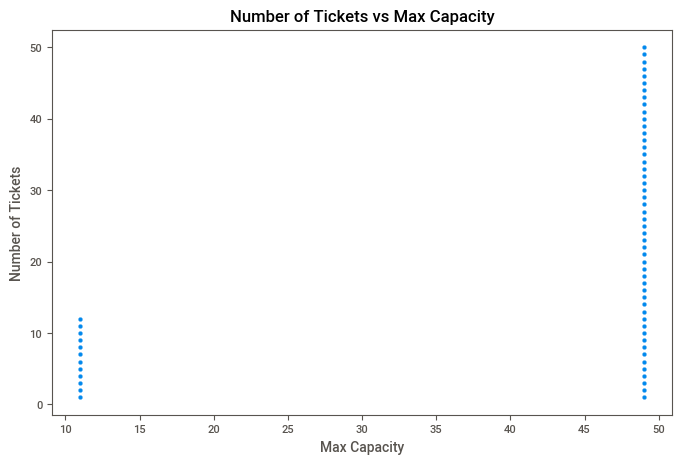

In [ ]:
# Scatterplot for max_capacity vs number_of_tickets
plt.figure(figsize=(8, 5))
sns.scatterplot(x="max_capacity", y="number_of_tickets", data=df_train, alpha=0.7)
plt.title("Number of Tickets vs Max Capacity")
plt.xlabel("Max Capacity")
plt.ylabel("Number of Tickets")
plt.show()

Feature Engineering And Selection:

In [ ]:

df_train = df_train.drop(columns=["seat_number", "payment_receipt","travel_to","travel_date","travel_time"])
df_train.head()

,ride_id,payment_method,travel_from,car_type,max_capacity,year,month,day,weekday,is_weekend,hour,minute,number_of_tickets
0,1442,Mpesa,Migori,Bus,49,2017,10,17,1,0,7,15,1
1,5437,Mpesa,Migori,Bus,49,2017,11,19,6,1,7,12,1
2,5710,Mpesa,Keroka,Bus,49,2017,11,26,6,1,7,5,1
3,5777,Mpesa,Homa Bay,Bus,49,2017,11,27,0,0,7,10,5
4,5778,Mpesa,Migori,Bus,49,2017,11,27,0,0,7,12,31


In [ ]:

df_train = pd.get_dummies(df_train, columns=['payment_method'], drop_first=True)
df_train = pd.get_dummies(df_train, columns=['car_type'], drop_first=True)



In [ ]:
#Encode travel_from using Target Encoding
#Replacing each location with the mean number of tickets sold and dropping the original column
#Helps the regression model capture patterns in travel_from.

df_train['travel_from_encoded'] = df_train.groupby('travel_from')['number_of_tickets'].transform('mean')
df_train.drop(columns=['travel_from'], inplace=True)
df_train.head() 


,ride_id,max_capacity,year,month,day,weekday,is_weekend,hour,minute,number_of_tickets,payment_method_Mpesa,car_type_shuttle,travel_from_encoded
0,1442,49,2017,10,17,1,0,7,15,1,True,False,27.375409
1,5437,49,2017,11,19,6,1,7,12,1,True,False,27.375409
2,5710,49,2017,11,26,6,1,7,5,1,True,False,6.528340
3,5777,49,2017,11,27,0,0,7,10,5,True,False,26.032360
4,5778,49,2017,11,27,0,0,7,12,31,True,False,27.375409


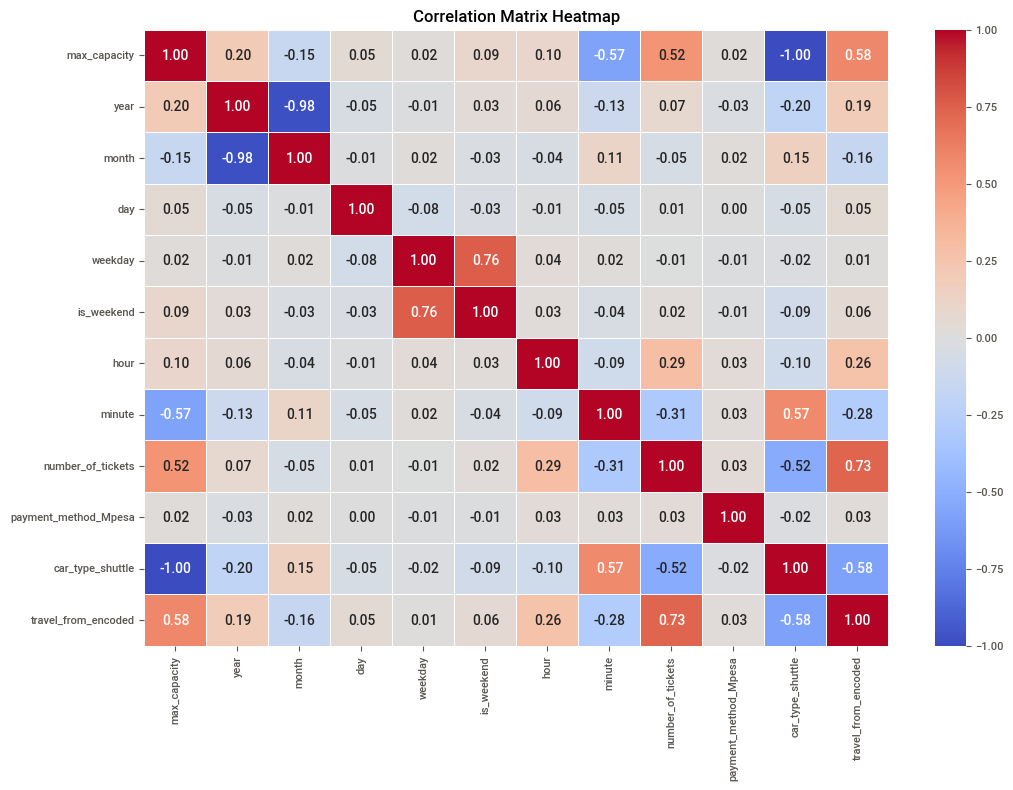

In [ ]:
# Exclude non-numeric columns from correlation matrix
correlation_matrix = df_train.drop(columns='ride_id').corr()

# Display Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
df_train.head()

,ride_id,max_capacity,year,month,day,weekday,is_weekend,hour,minute,number_of_tickets,payment_method_Mpesa,car_type_shuttle,travel_from_encoded
0,1442,49,2017,10,17,1,0,7,15,1,True,False,27.375409
1,5437,49,2017,11,19,6,1,7,12,1,True,False,27.375409
2,5710,49,2017,11,26,6,1,7,5,1,True,False,6.528340
3,5777,49,2017,11,27,0,0,7,10,5,True,False,26.032360
4,5778,49,2017,11,27,0,0,7,12,31,True,False,27.375409


In [ ]:
df_train.columns

Index(['ride_id', 'max_capacity', 'year', 'month', 'day', 'weekday',
       'is_weekend', 'hour', 'minute', 'number_of_tickets',
       'payment_method_Mpesa', 'car_type_shuttle', 'travel_from_encoded'],
      dtype='object')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

X = df_train[['travel_from_encoded', 'car_type_shuttle', 'hour', 'minute', 'year', 'month', 'day', 'weekday', 'is_weekend', 'payment_method_Mpesa', 'max_capacity']]
y = df_train['number_of_tickets']

model = RandomForestRegressor()
model.fit(X, y)

# Get feature importance scores
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
selected_features = feature_importance[feature_importance > 0.01].index  # Keep important features

df_train[selected_features].head()


,travel_from_encoded,car_type_shuttle,hour,minute,month,day,weekday,max_capacity
0,27.375409,False,7,15,10,17,1,49
1,27.375409,False,7,12,11,19,6,49
2,6.528340,False,7,5,11,26,6,49
3,26.032360,False,7,10,11,27,0,49
4,27.375409,False,7,12,11,27,0,49


In [ ]:
df_train.columns

Index(['ride_id', 'max_capacity', 'year', 'month', 'day', 'weekday',
       'is_weekend', 'hour', 'minute', 'number_of_tickets',
       'payment_method_Mpesa', 'car_type_shuttle', 'travel_from_encoded'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

X = df_train[["travel_from_encoded","car_type_shuttle","hour","minute","month","day","weekday","max_capacity"]] # Features
y = df_train['number_of_tickets']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
